# Contraceptive Method Choice

In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Import dataset

**original dataset info**

   1. Wife's age                     (numerical)
   2. Wife's education               (categorical)      1=low, 2, 3, 4=high
   3. Husband's education            (categorical)      1=low, 2, 3, 4=high
   4. Number of children ever born   (numerical)
   5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
   6. Wife's now working?            (binary)           0=Yes, 1=No
   7. Husband's occupation           (categorical)      1, 2, 3, 4
   8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high
   9. Media exposure                 (binary)           0=Good, 1=Not good
   10. Contraceptive method used     (class attribute)  1=No-use, 2=Long-term, 3=Short-term **<=**
   
**_Notes_**
- Column #10 is to be predicted.
- I'm going to change columns names and invert some of the values, as they don't correspond to common notation (e.g. #5,6,9)

In [2]:
path_to_data_set = os.path.join("UCI_datasets", "cmc", "cmc.data")

names = {
    "W_AGE"                  : 'int8',
    "W_EDU"                  : 'category',
    "H_EDU"                  : 'category',
    "NUM_CHILDREN"           : 'int8',
    "W_ISLAM"                : 'bool',
    "W_WORKING"              : 'bool',
    "H_JOB"                  : 'category',
    "SOL"                    : 'category',
    "BAD_MEDIA"              : 'bool',
    "CONT_USAGE"             : 'category'
}

table = pd.read_table(path_to_data_set, delimiter=",",  
                      header=None, index_col=False, 
                      names=names.keys(),
                      dtype=names,
                      engine='python'
                     )

In [3]:
table.head()

,W_AGE,W_EDU,H_EDU,NUM_CHILDREN,W_ISLAM,W_WORKING,H_JOB,SOL,BAD_MEDIA,CONT_USAGE
0,24,2,3,3,True,True,2,3,False,1
1,45,1,3,10,True,True,3,4,False,1
2,43,2,3,7,True,True,3,4,False,1
3,42,3,2,9,True,True,3,3,False,1
4,36,3,3,8,True,True,3,2,False,1


inverting values of columns

In [4]:
table["W_WORKING"] = table["W_WORKING"].apply(lambda x: not x)
# table["W_ISLAM"] = table["W_ISLAM"].apply(lambda x: not x)

### Data visualization

#### Unique values

In [5]:
for x in table.columns:
    print(x)
    print(table[x].unique())

W_AGE
[24 45 43 42 36 19 38 21 27 44 26 48 39 37 46 40 29 31 33 25 28 47 32 49
 34 20 22 30 23 35 41 17 18 16]
W_EDU
[2, 1, 3, 4]
Categories (4, object): [2, 1, 3, 4]
H_EDU
[3, 2, 4, 1]
Categories (4, object): [3, 2, 4, 1]
NUM_CHILDREN
[ 3 10  7  9  8  0  6  1  2  4  5 12 11 13 16]
W_ISLAM
[ True False]
W_WORKING
[False  True]
H_JOB
[2, 3, 1, 4]
Categories (4, object): [2, 3, 1, 4]
SOL
[3, 4, 2, 1]
Categories (4, object): [3, 4, 2, 1]
BAD_MEDIA
[False  True]
CONT_USAGE
[1, 2, 3]
Categories (3, object): [1, 2, 3]


#### Correlation matrix
It's only available for numeric values, but still worthy to have a look

In [6]:
corr_matrix = table.corr().round(2)

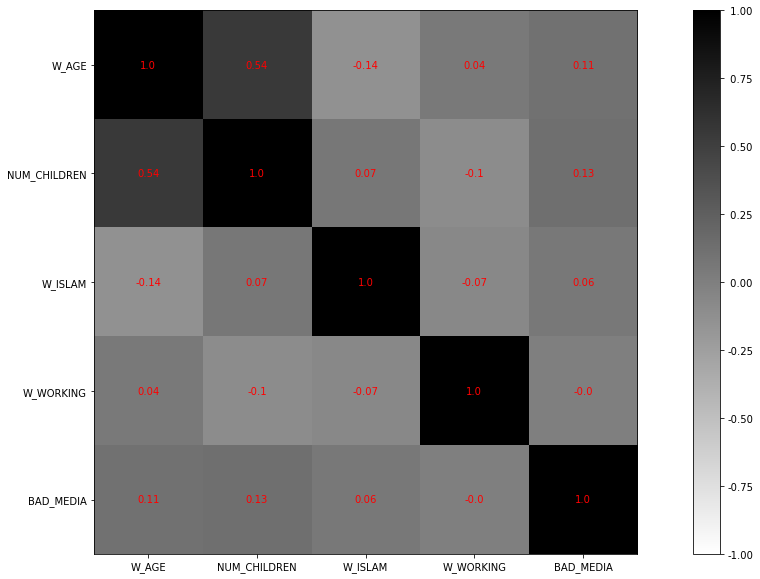

In [7]:
ig, ax = plt.subplots(figsize=(10,10))
ig.set_figwidth(20)

im = ax.imshow(corr_matrix, cmap='binary', interpolation='nearest')
im.set_clim(-1, 1)
ax.grid(False)
cols = ["",'W_AGE', 'NUM_CHILDREN', 'W_ISLAM', 'W_WORKING', 'BAD_MEDIA']

ax.set_xticklabels(cols)
ax.set_yticklabels(cols)

for i in range(5):
    for j in range(5):
        ax.text(j, i, corr_matrix.iloc[i, j], ha='center', va='center', color='r')
        

cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

Wife's Age histogram

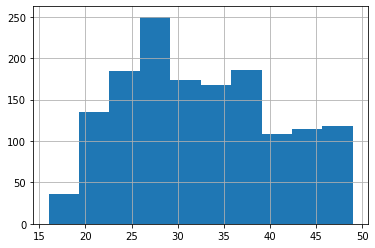

In [8]:
table['W_AGE'].hist()

 1. No-use
 2. Long-term
 3. Short-term 

Exploring number of values in each category
1. No-use
2. Long-term
3. Short-term 

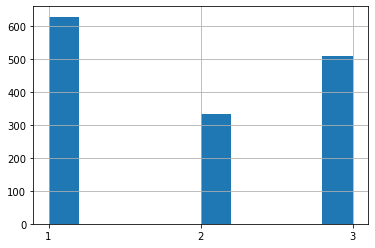

In [9]:
table['CONT_USAGE'].hist()

## Comparing models

`macro` is necessary for multilable classifiers

In [10]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_predict

def metrics(clf, X, Y, t_x, t_y):
    pred = cross_val_predict(clf, X, Y, cv=3)
    y_pred = clf.predict(t_x)
    
    print('Accuracy on test set: {:.4%}'.format(accuracy_score(t_y, y_pred)))
    print('F1: {:.4%}'.format(f1_score(Y, pred, average="macro")))
    print('Precision: {:.4%}'.format(precision_score(Y, pred, average="macro")))
    print('Recall: {:.4%}'.format(recall_score(Y, pred, average="macro")))

### dataset split

In [11]:
X = table.drop(columns=['CONT_USAGE'], inplace=False)
y = table['CONT_USAGE'].copy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

### Feature importance

In [12]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X, y)

RandomForestClassifier(random_state=42)

In [13]:
rnd_clf.feature_importances_

array([0.34904753, 0.08156451, 0.06512604, 0.23857516, 0.03334789,
       0.04501532, 0.08325647, 0.08858217, 0.01548491])

## Train model on original data

### A lot of classifiers with basic arguments

In [14]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier

import seaborn as sns
import matplotlib.pyplot as plt

def choose_best_clf(X_train, X_test, y_train, y_test):
    classifiers = [
        KNeighborsClassifier(),
        SVC(kernel="rbf", C=0.025, probability=True),
        NuSVC(probability=True),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        GaussianNB(),
        GaussianProcessClassifier(),
        MultinomialNB(),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis(),
        ]
    
    # Logging for Visual Comparison
    log_cols=["Classifier", "Accuracy", "Log Loss"]
    log = pd.DataFrame(columns=log_cols)


    for clf in classifiers:
        name = clf.__class__.__name__
        try:
            clf.fit(X_train, y_train)
            print("="*30)
            print(name)
            print('****Results****')
            train_predictions = clf.predict(X_test)
            acc = accuracy_score(y_test, train_predictions)
            print("Accuracy: {:.4%}".format(acc))

            train_predictions = clf.predict_proba(X_test)
            ll = log_loss(y_test, train_predictions)
            print("Log Loss: {}".format(ll))

            log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
            log = log.append(log_entry)
        except ValueError:
            print("="*30, '\n')
            print(name, 'cannot be trained')

#     print("="*30)
    sns.set_color_codes("muted")
    sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

    plt.xlabel('Accuracy %')
    plt.title('Classifier Accuracy')
    plt.show()

    sns.set_color_codes("muted")
    sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

    plt.xlabel('Log Loss')
    plt.title('Classifier Log Loss')
    plt.show()

KNeighborsClassifier
****Results****
Accuracy: 48.6486%
Log Loss: 3.7948120913580325
SVC
****Results****
Accuracy: 43.9189%
Log Loss: 0.9753907527846533
NuSVC
****Results****
Accuracy: 46.6216%
Log Loss: 0.9759345498218298
DecisionTreeClassifier
****Results****
Accuracy: 45.2703%
Log Loss: 18.000338720267504
RandomForestClassifier
****Results****
Accuracy: 49.3243%
Log Loss: 1.3428526739195512
AdaBoostClassifier
****Results****
Accuracy: 47.9730%
Log Loss: 1.0768183661466726
GradientBoostingClassifier
****Results****
Accuracy: 49.3243%
Log Loss: 0.9805601201897831
GaussianNB
****Results****
Accuracy: 40.5405%
Log Loss: 1.372260914460086
GaussianProcessClassifier
****Results****
Accuracy: 51.3514%
Log Loss: 1.0549064776424932
MultinomialNB
****Results****
Accuracy: 48.6486%
Log Loss: 0.9747658072111113
LinearDiscriminantAnalysis
****Results****
Accuracy: 46.6216%
Log Loss: 0.9530412330776717
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 52.0270%
Log Loss: 1.096648856301224


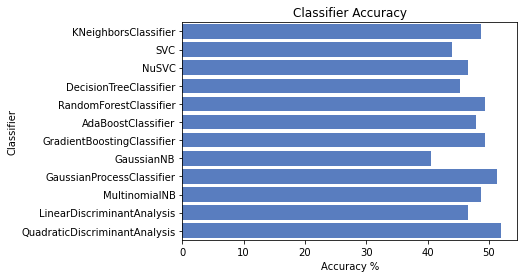

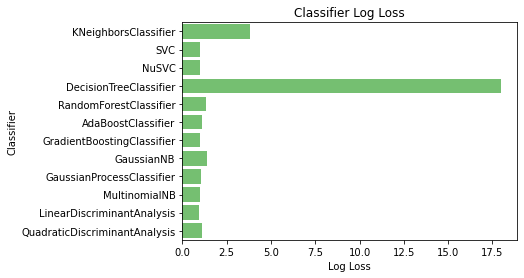

In [15]:
choose_best_clf(X_train, X_test, y_train, y_test)

### Dimensionality reduction on original data

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)

In [18]:
d

1

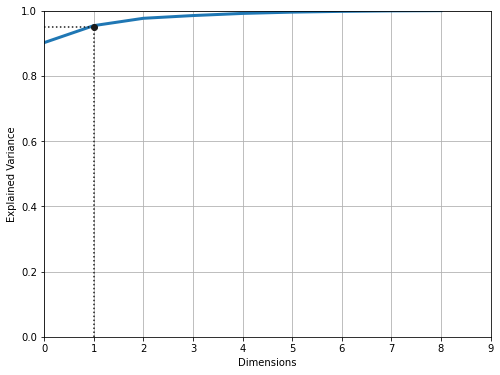

In [19]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 9, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")

plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

In [20]:
pca = PCA(n_components=d)
pca.fit(X)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

# X_recovered = pca.inverse_transform(X_train_reduced_5)

In [21]:
X_train_reduced

array([[ -3.36920228],
       [ -6.5112528 ],
       [-11.90953143],
       ...,
       [  2.73955559],
       [  1.26958396],
       [ -9.7803559 ]])

KNeighborsClassifier
****Results****
Accuracy: 43.9189%
Log Loss: 6.559023310605822
SVC
****Results****
Accuracy: 45.2703%
Log Loss: 1.0565714145740448
NuSVC
****Results****
Accuracy: 45.9459%
Log Loss: 1.0618829466038602
DecisionTreeClassifier
****Results****
Accuracy: 40.5405%
Log Loss: 18.947869444060224
RandomForestClassifier
****Results****
Accuracy: 40.5405%
Log Loss: 6.471263026293829
AdaBoostClassifier
****Results****
Accuracy: 39.1892%
Log Loss: 1.0949003605438463
GradientBoostingClassifier
****Results****
Accuracy: 42.5676%
Log Loss: 1.069908694754096
GaussianNB
****Results****
Accuracy: 50.0000%
Log Loss: 1.0177239218671852
GaussianProcessClassifier
****Results****
Accuracy: 36.4865%
Log Loss: 1.054071807705116

MultinomialNB cannot be trained
LinearDiscriminantAnalysis
****Results****
Accuracy: 50.6757%
Log Loss: 1.0255157083047528
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 50.0000%
Log Loss: 1.0177715986871854


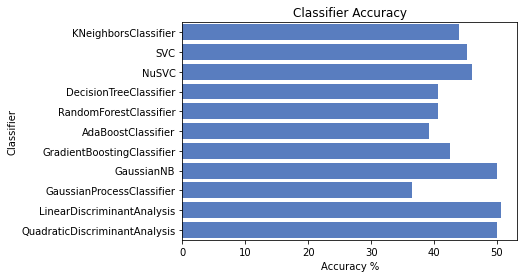

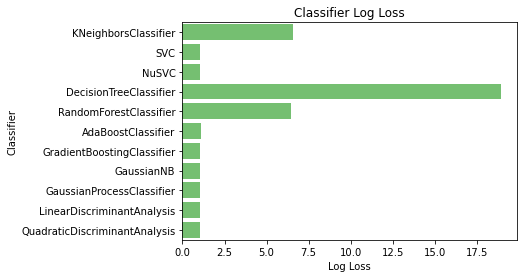

In [22]:
choose_best_clf(X_train_reduced, X_test_reduced, y_train, y_test)

## Bucketing(binning) values

To produce better results in training I'll bucket continuous variable in to discrete chunks.

Let's first explore histogram, to have a rough understanding of how many records we have in each age category

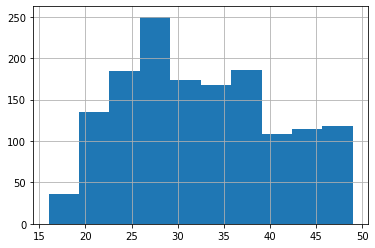

In [23]:
table['W_AGE'].hist()

Lets bucket in 4 different ranges, to make it more balanced the following ranges are chosen (pretty close to percentiles):

`[0, 25], (25, 32], (32, 40], (40, 50]`

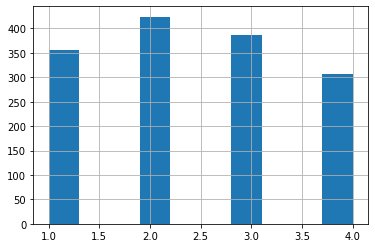

In [24]:
bins = [0, 25, 32, 40, 50]
labels = [1,2,3,4]

table['W_AGE_binned'] = pd.cut(table['W_AGE'], bins=bins, labels=labels)
# table = table.astype({'W_AGE_binned' : 'category'})
table['W_AGE_binned'].hist()
table.drop(columns=['W_AGE'], inplace=True)

Now is the time to bucket another discrete valued column. Let's look at number of unique values

In [25]:
table['NUM_CHILDREN'].value_counts()

2     276
1     276
3     259
4     197
5     135
0      97
6      92
7      49
8      47
9      16
11     11
10     11
12      4
13      2
16      1
Name: NUM_CHILDREN, dtype: int64

Due to bucketing limitations, I'll change all 0s to -1s, so .cut() can still be used

In [26]:
table["NUM_CHILDREN"] = table["NUM_CHILDREN"].apply(lambda x: -1 if x == 0 else x)

The here I'm going to bucket values according to the real world perspective

`[0], [1], [2, 3], [3, 5], [5+]`

So we can distinguish families without kids from families with kids, and small families from bigger families. This approach might be usefull for a more extensive research.

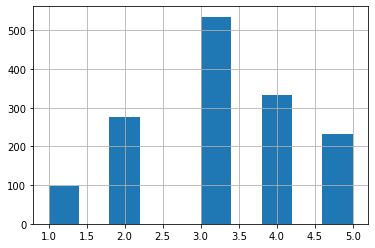

In [27]:
bins = [-2, 0, 1, 3, 5, 20]
labels = [1,2,3,4, 5]


table['NUM_CHILDREN_binned'] = pd.cut(table['NUM_CHILDREN'], bins=bins, labels=labels)
# table = table.astype({'W_AGE_binned' : 'category'})
table['NUM_CHILDREN_binned'].hist()
table.drop(columns=['NUM_CHILDREN'], inplace=True)

In [28]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   W_EDU                1473 non-null   category
 1   H_EDU                1473 non-null   category
 2   W_ISLAM              1473 non-null   bool    
 3   W_WORKING            1473 non-null   bool    
 4   H_JOB                1473 non-null   category
 5   SOL                  1473 non-null   category
 6   BAD_MEDIA            1473 non-null   bool    
 7   CONT_USAGE           1473 non-null   category
 8   W_AGE_binned         1473 non-null   category
 9   NUM_CHILDREN_binned  1473 non-null   category
dtypes: bool(3), category(7)
memory usage: 15.7 KB


## Training models on dataset with binned data

In [29]:
X = table.drop(columns=['CONT_USAGE'], inplace=False)
y = table['CONT_USAGE'].copy()

Xb_train, Xb_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

KNeighborsClassifier
****Results****
Accuracy: 50.6757%
Log Loss: 3.7555535001168585
SVC
****Results****
Accuracy: 48.6486%
Log Loss: 0.9415688952293617
NuSVC
****Results****
Accuracy: 54.7297%
Log Loss: 0.931951816812394
DecisionTreeClassifier
****Results****
Accuracy: 54.0541%
Log Loss: 11.455570305946884
RandomForestClassifier
****Results****
Accuracy: 58.7838%
Log Loss: 1.0147924047440746
AdaBoostClassifier
****Results****
Accuracy: 54.0541%
Log Loss: 1.079324645041227
GradientBoostingClassifier
****Results****
Accuracy: 54.7297%
Log Loss: 0.8878524703277783
GaussianNB
****Results****
Accuracy: 47.2973%
Log Loss: 1.2006194025031653
GaussianProcessClassifier
****Results****
Accuracy: 57.4324%
Log Loss: 0.9549206609032234
MultinomialNB
****Results****
Accuracy: 54.0541%
Log Loss: 0.945102281103701
LinearDiscriminantAnalysis
****Results****
Accuracy: 54.7297%
Log Loss: 0.9082299170675819
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 53.3784%
Log Loss: 1.055588535742657


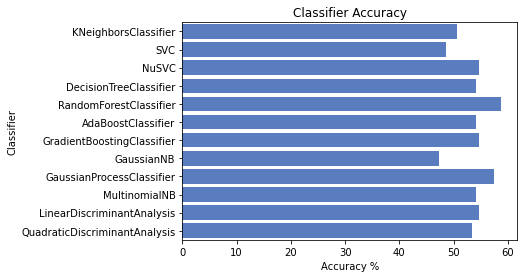

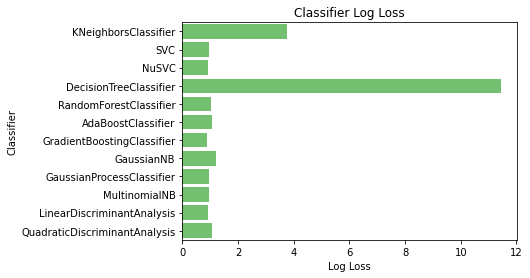

In [30]:
choose_best_clf(Xb_train, Xb_test, y_train, y_test)

data bining didn't make much difference, it only made precision/recall scores better

### Dimensionality reduction on binned data

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)

In [33]:
d

6

Even though it says ther variance above 95% can be achieved with 6 parameters (originally there are 9),
but from the following graph we can see, that ~95% variance can be achieved with just 5 parameters, which is almost twice less than in the original data

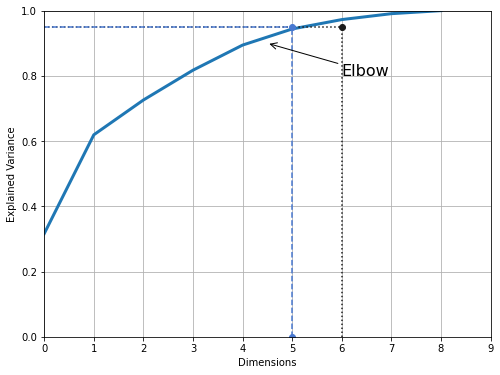

In [34]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 9, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")


plt.plot([5, 5], [0, 0.95], marker='o', color='b', linestyle="--")
plt.plot([0, 5], [0.95, 0.95],color='b', linestyle="--")

plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(4.5, 0.9), xytext=(6, 0.8),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [35]:
pca = PCA(n_components=d)
pca.fit(X)
Xb_train_reduced = pca.transform(Xb_train)
Xb_test_reduced = pca.transform(Xb_test)


In [36]:
X_train_reduced

array([[ -3.36920228],
       [ -6.5112528 ],
       [-11.90953143],
       ...,
       [  2.73955559],
       [  1.26958396],
       [ -9.7803559 ]])

KNeighborsClassifier
****Results****
Accuracy: 54.0541%
Log Loss: 3.282629750060671
SVC
****Results****
Accuracy: 49.3243%
Log Loss: 0.9584195303869694
NuSVC
****Results****
Accuracy: 52.0270%
Log Loss: 0.9228888572729498
DecisionTreeClassifier
****Results****
Accuracy: 56.0811%
Log Loss: 11.214204563298008
RandomForestClassifier
****Results****
Accuracy: 51.3514%
Log Loss: 1.2047016910765
AdaBoostClassifier
****Results****
Accuracy: 56.0811%
Log Loss: 1.071385041112866
GradientBoostingClassifier
****Results****
Accuracy: 58.7838%
Log Loss: 0.8987588941983775
GaussianNB
****Results****
Accuracy: 54.0541%
Log Loss: 0.9147924876486879
GaussianProcessClassifier
****Results****
Accuracy: 56.7568%
Log Loss: 0.9359595732025064

MultinomialNB cannot be trained
LinearDiscriminantAnalysis
****Results****
Accuracy: 54.0541%
Log Loss: 0.9159882678117478
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 50.0000%
Log Loss: 0.9397494756075183


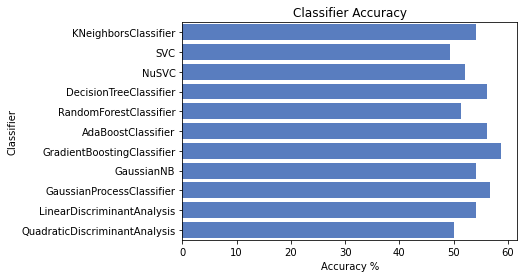

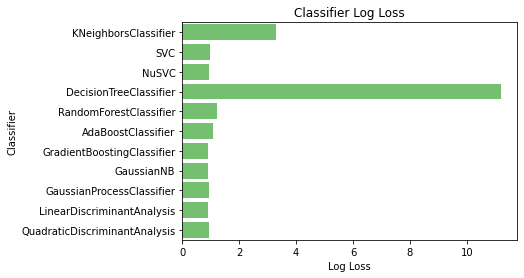

In [37]:
choose_best_clf(Xb_train_reduced, Xb_test_reduced, y_train, y_test)

## One hot encoding binned data set

In [38]:
encoded_table = pd.get_dummies(table, columns=["W_EDU", "H_EDU", "H_JOB", "SOL", "W_AGE_binned", "NUM_CHILDREN_binned"])

In [39]:
encoded_table

,W_ISLAM,W_WORKING,BAD_MEDIA,CONT_USAGE,W_EDU_1,W_EDU_2,W_EDU_3,W_EDU_4,H_EDU_1,H_EDU_2,...,SOL_4,W_AGE_binned_1,W_AGE_binned_2,W_AGE_binned_3,W_AGE_binned_4,NUM_CHILDREN_binned_1,NUM_CHILDREN_binned_2,NUM_CHILDREN_binned_3,NUM_CHILDREN_binned_4,NUM_CHILDREN_binned_5
0,True,False,False,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,True,False,False,1,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,True,False,False,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,True,False,False,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,True,False,False,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,True,True,False,3,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1469,True,False,False,3,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1470,True,True,False,3,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1471,True,True,False,3,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [40]:
X = encoded_table.drop(columns=['CONT_USAGE'], inplace=False)
y = encoded_table['CONT_USAGE'].copy()

Xe_train, Xe_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

KNeighborsClassifier
****Results****
Accuracy: 49.3243%
Log Loss: 4.705203518678691
SVC
****Results****
Accuracy: 45.9459%
Log Loss: 0.9874166790836346
NuSVC
****Results****
Accuracy: 52.0270%
Log Loss: 0.9973041700936793
DecisionTreeClassifier
****Results****
Accuracy: 45.9459%
Log Loss: 13.57258173165127
RandomForestClassifier
****Results****
Accuracy: 52.0270%
Log Loss: 2.202999862602944
AdaBoostClassifier
****Results****
Accuracy: 56.0811%
Log Loss: 1.0778010696408808
GradientBoostingClassifier
****Results****
Accuracy: 57.4324%
Log Loss: 0.9425907120245222
GaussianNB
****Results****
Accuracy: 40.5405%
Log Loss: 5.91137361922293
GaussianProcessClassifier
****Results****
Accuracy: 52.7027%
Log Loss: 1.0056732588877944
MultinomialNB
****Results****
Accuracy: 50.0000%
Log Loss: 1.0169783808918313
LinearDiscriminantAnalysis
****Results****
Accuracy: 56.7568%
Log Loss: 0.9424601105522454
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 36.4865%
Log Loss: 18.858169368640777


/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


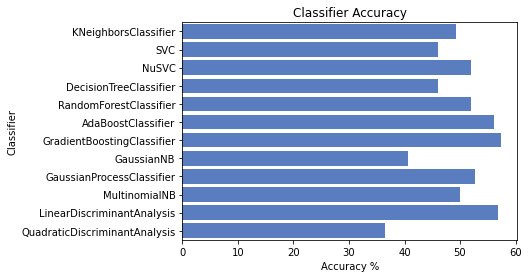

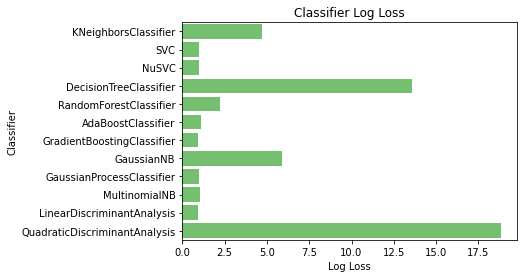

In [41]:
choose_best_clf(Xe_train, Xe_test, y_train, y_test)

### XGBoost models

In [42]:
from xgboost import XGBClassifier

In [43]:
# fit model no training data
xgb = XGBClassifier(learning_rate=0.001, 
                    n_estimators=3000,
                    gamma=5,
                    max_depth=3,
                    colsample_bytree=0.6,
                    min_child_weight=1,
                    subsample=0.6,
                    objective='multi:softmax',
                    silent=True,
                    tree='hist'
                   )
xgb.fit(Xe_train, y_train)

[00:42:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:485: 
Parameters: { silent, tree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3000, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, silent=True, subsample=0.6,
              tree='hist', tree_method='exact', validate_parameters=1,
              verbosity=None)

In [44]:
metrics(xgb, Xe_train, y_train, Xe_test, y_test)

[00:42:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:485: 
Parameters: { silent, tree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:42:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:485: 
Parameters: { silent, tree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:42:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:485: 
Parameters: { silent, tree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used 

## Neural Network

In [45]:
from sklearn.neural_network import MLPClassifier


In [46]:
mlp_clf = MLPClassifier(random_state=1, max_iter=300)

#### training on original non-binned non-reduced data

In [47]:
mlp_clf.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=1)

In [48]:
mlp_clf.predict_proba(X_test[:1])

array([[0.54075737, 0.25383141, 0.20541121]])

In [49]:
mlp_clf.score(X_test, y_test)

0.49324324324324326

#### On reduced data

In [50]:
mlp_clf = MLPClassifier(random_state=1, max_iter=500)
mlp_clf.fit(X_train_reduced, y_train)
mlp_clf.score(X_test_reduced, y_test)

0.4189189189189189

#### On binned data

In [51]:
mlp_clf = MLPClassifier(random_state=1, max_iter=700)
mlp_clf.fit(Xb_train, y_train)
mlp_clf.score(Xb_test, y_test)

0.39864864864864863

#### On binned reduced data

In [52]:
mlp_clf = MLPClassifier(random_state=1, max_iter=1500)
mlp_clf.fit(Xb_train_reduced, y_train)
mlp_clf.score(Xb_test_reduced, y_test)


0.3581081081081081

#### On hot ohe encoded data

In [53]:
mlp_clf = MLPClassifier(random_state=1, max_iter=1000)
mlp_clf.fit(Xe_train, y_train)
mlp_clf.score(Xe_test, y_test)

0.4527027027027027